# DESCRIPTIVE STATISTICS

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import pylab as py
import seaborn as sns
import scipy
import math

In [2]:
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [ ]:
data.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


## Central Tendency
Central tendency refers to the concept that there is a particular number that can best summarise an entire dataset of measurements, a number which is in some way "central" to the set.  
## Mean
Mean, or more commonly called as average, is a central tendency of a dataset, i.e. a number around which a whole data is spread out.  
In order to calculate the mean of a set of number we simply divide the sum of the numbers by the total number of data points. In other words it is the sum of the number divided by the count.

$$
Mean =\frac{ \sum_{i=1}^{n} x}{n}
$$

In [ ]:
data['Mthly_HH_Income'].mean()

41558.0

In the cell above we have calculated the mean for the column "Mthly_HH_Income" using the mean()  
This can also be done by making use of a for loop in the following manner:

In [ ]:
sum = 0
for i in range(len(data['Mthly_HH_Income'])):
  sum += data['Mthly_HH_Income'][i]
mean = sum/len(data['Mthly_HH_Income'])
print(mean)

41558.0


## Median
The median is the value which divvides the data in 2 equal parts i.e. the number of terms on the right of the data point is equal to the number of terms to the left of it, provided that the data is arranged in either the ascending or the descending order.  
However, sorting the data in descending affects the Inter Quartile Range, making it negative, although it will have no effect on the median value.  
The median will be the middle term when the total number of terms is odd.  
While it will be the mean of the 2 middle terms when the total number of terms in even.

$$
Median = \frac{(N + 1)}{2}^{th} term; for N = odd  \\
Median = \frac{\frac{N}{2}^{th} term + (\frac{N}{2} + 1)^{th} term}{2}; for N = even
$$

Another important thing to note is that when the values of the dataset are in arithmetic progression the **median is always eual to the mean**. 

In [ ]:
data['No_of_Fly_Members'].median()

4.0

The above line of code gives us the median for the colum "No_of_Fly_Members".  
Another to find the median without using the median() is as follows:

In [ ]:
length = len(data['No_of_Fly_Members'])
if length % 2 == 0:
  median = (data['No_of_Fly_Members'][length//2] + data['No_of_Fly_Members'][(length//2) + 1])/2
else:
  median = data['No_of_Fly_Members'][(length + 1)//2]
print(median)

4.0


## Mode
Mode is the term appearing the most in a dataset i.e. a term with the highest frequency.  
There could however be a possibility that a particular dataset has no mode since all the values in the dataset appear equal number of times.  
If 2 values appear equal number of times which is more than the number of times any other value appears in a dataset, then such a dataset is **bimodal**.  
If 3 values appeared the same number of times and more than the rest of the values, then such a dataset is **trimodal**.  
For n modes, that dataset is **multimodal**.

$$
Mode = The\,value\,in\,the\,data\,that\,occurs\,most\,frequently
$$

In [ ]:
data['Emi_or_Rent_Amt'].mode()[0]

0

In [ ]:
data['Emi_or_Rent_Amt'].value_counts()

0        30
3500      3
3000      2
10000     2
8000      2
12000     2
2000      2
5000      2
1000      1
20000     1
4000      1
35000     1
2500      1
Name: Emi_or_Rent_Amt, dtype: int64

The above lines of code tell us that the value 0 is the most common value in the column "Emi_or_Rent_Amt".

## Measure of Spread / Dispersion
Measure of Spread refers to the idea of variability within a given dataset.  
#Standard Deviation
Standard Deviation is the measure of the average distance between each quantity and the mean. This tells us how the data is spread out from the mean.  
 A low standard deviation indicates that the data points tend to be close to the mean of the data set, while a high standard deviation indicates that the data points are spread out over a wider range of values.  
When we are asked to find the standard deviation of a part of a population, then we make use of sample Standard Deviation.
$$
Standard Deviation = \sqrt{\frac{1}{n-1}\sum_{i=0}^{n}(x_i-Mean)^{2}}
$$
Here, we are taking into account the mean of the sample.  
But when have to deal with a whole population, then we use population Standard Deviation.
$$
Standar Deviation = \sqrt{\frac{1}{n}\sum_{i=0}^{n}(x_i - Mean)^{2}}
$$
Here, we are taking into account the Mean of the entire population.

In [ ]:
data['Emi_or_Rent_Amt'].std()

6241.434947516607

The above line of code gives us the value of the standard deviation for the column "Emi_or_Rent_Amt" using the std().  
The following ode shows us how to calculate the standard deviatin without the std().

In [ ]:
n = len(data['Emi_or_Rent_Amt'])
sum = 0
for i in range(length):
  sum += data['Emi_or_Rent_Amt'][i]
mean = sum / length
diff_square = 0
for i in range(length):
  diff_square += (data['Emi_or_Rent_Amt'][i] - mean) ** 2
std = math.sqrt(diff_square / (length-1))
print(std)

6241.434947516607


## Variance
Variance is the square of the average distance between each quantity and the mean. That is, it is the square of the standard deviation.
$$
Variance = (Standard Deviation)^2\\
OR\\
Variance = \frac{1}{n}\sum_{i=0}^{n}(x - Mean)^2
$$

In [ ]:
data['Mthly_HH_Expense'].var()

146173342.85714287

The above line of code gives us the variance for the "Mthly_HH_Expense" column by making use of the inbuilt var().  
To calculate variance without making use of the inbuilt function we can do as follows:

In [ ]:
n = len(data['Mthly_HH_Expense'])
sum = 0
for i in range(length):
  sum += data['Mthly_HH_Expense'][i]
mean = sum / length
diff_square = 0
for i in range(length):
  diff_square += (data['Mthly_HH_Expense'][i] - mean) ** 2
variance = (diff_square / (length-1))
print(variance)

146173342.85714287


## Correlation
Correlation is a statistical technique which can show whether and how strongly pairs of variables are related. 
<!-- ![Alt Text](image path "title") -->
![Alt Text](https://miro.medium.com/max/716/1*P5L0g1YjeRZchbJiFll-0g.jpeg "Types of Correlations")  
The main result of a correlation is called the **correlation coefficient** or "r". It ranges from -1.0 to +1.0. The closer r is to +1 or -1, the more closely the two cariables are related.  
If r is close to 0, it means there is no relationship between the variables. If r is positive, it means that as one variable gets larger the other one gets larger. If r is negative it means that as one gets larger, the other one gets smaller (often called an "inverse" correlation). 

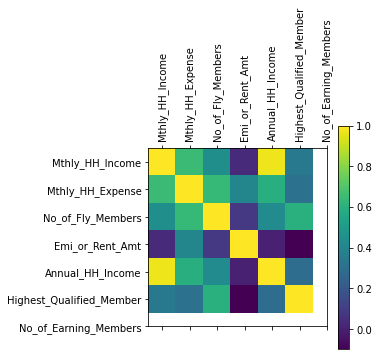

In [ ]:
plt.matshow(data.corr())
plt.xticks(range(len(data.columns)), data.columns, rotation = 90)
plt.yticks(range(len(data.columns)), data.columns)
plt.colorbar()
plt.show()

The above is a correlation matrix for the given dataset.

## Normal Distribution
![Alt Text](https://cdn.kastatic.org/ka-perseus-graphie/ab1906e261749f6c28837cd46cf5d8ce8683116a.svg "Normal Distribution Curve")  
The above is a curve showing a normal distribution.  
In probability theory, a normal (or Gaussian) distribution is a type of continuous probability distribution for a real-valued random variable. 
The general formula of its probability density function is :
$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{\pi-\mu}{\sigma})^2}\\
where\, \mu\, is\, the\, mean\, of\, the\, distribution,\\ and\, the\, parameter\, \sigma\, is\, its\, standard\, deviation.
$$
 A random variable with a Gaussian distribution is said to be **normally distributed**, and is called a **normal deviate**.  
Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known. Their importance is partly due to the central limit theorem. It states that, under some conditions, the average of many samples (observations) of a random variable with finite mean and variance is itself a random variable - whose distribution converges to a normal distribution as the number of samples increases. Therefore, physical quantities that are expected to be the sum of many independent processes, such as measurement errors, often have distributions that are nearly normal. 

## Features of Normal Distribution
### The Data is Centered about the Mean-Mode-Median
* The mean, median and mode of the normal distribution are equal and are located at the center of the curve.
  * It is the mean since it is the ARITHMETIC average of all the values.
  * It is the mode since of all the values the mean value occurs MOST often.
  * It is the median because when the values are displayed from lowest to highest, the mean is the MIDDLE score, the median.
* The frequency curve is bell shaped.
  * The bell shape has perfect bilateral symmetry - which means that the left balances exactly with the right.
  * The value at -2 is balanced by a value at +2 and the frequency from 0 to +2 and from 0 to -2 are equal.
  * The are under the curve from 0 to +2 is exactly the same as the area under the curve from 0 to -2.
  * Fifty percent of the values are above the mean and 50% of the values are below the mean.
* The probability that a value is above the mean is 50% and the probability that the value is below the mean is 50%.
* Most of the values are in the middle, about the mean, and few are in the tails, at the extremes.
![Alt Text](https://spss-tutorials.com/img/normal-distribution-iq-scores-example-2.png "Normal Distribution Curve")  
The above graph shows the percentage of data present within different numbers of standard deviations away from the mean.

## Skewed Distribution
If one tail is longer than oanother, the distribution is skewed. These distributions are sometimes called asymmetric or asymmetrical distributions as they do not show any kind of symmetru. Symmetry means that one half of the distribution is a mirror image of the other half. For example, the **normal distribution** is a symmetric distribution with no skew. The tails are exactly the same. 

### Left Skewed Distribution
A **left-skewed distribution** is a distribution which has a long left tail. Left-skewed distributions are also called *negatively-skewed* distributions. This is because there is a long tail in the negative directin on the number line. The mean is also to the left of the peak.
![Alt Text](https://www.statisticshowto.com/wp-content/uploads/2015/07/skewed-left.png "Left-Skewed Distribution Curve")  

### Right Skewed Distribution
A **right-skewed distribution** is a distribution which has a long right tail. Right-skewed distributionss are also called positive-skew distributions. This is because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak. 
![Alt Text](https://psychologyhub.co.uk/ezoimgfmt/i1.wp.com/psychologyhub.co.uk/wp-content/uploads/2018/01/right-skewed-graph.jpg?w=367&is-pending-load=1 "Left-Skewed Distribution Curve")  






## Effect on Mean, Median and Mode due to Skewness
### Skewed Left
* The mean is to the left of the peak. This is the main definition behind "skewness", which is technically a measure of the distribution of values around the mean.
* The mean of a left skewed distribution is to the left of the median.
* The tail is longer on the left.

### Skewed Right
* The mean is to the right of the peak. 
* The mean of a right skewed distribution is to the right of the median.
* The tail is longer to the right.

## QQ Plot (Quantile - Quantile Plot)
A Q-Q plot is a scatterplot which is created by plotting two sets of quantiles against one another. The pattern of points in the plot is used to compare the two distributions. If both sets of quantiles came from the same distribution, we should see the points forming a line that is roughly straight.  
The main step in constructing a Q-Q plot is calculating or estimating the quantiles to be plotted. If one or both of the axes is a Q-Q plot is bases on a theoretical distribution with a continuous cumulative distribution function (CDF), all quantiles are uniquely defined and can be obtained by inverting the CDF.

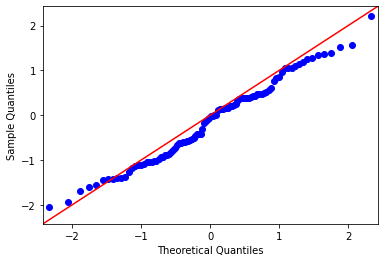

In [7]:
data_points = np.random.normal(0, 1, 100)    
  
sm.qqplot(data_points, line ='45')
py.show()

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

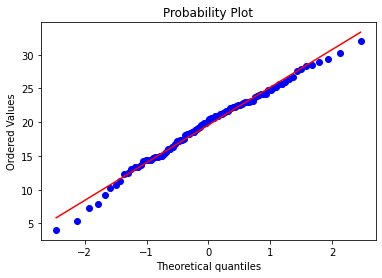

In [11]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)

scipy.stats.probplot(measurements, dist="norm", plot=plt)

## Box Cox
The Box-Cox plot is a tool to help you determine the most appropriate power transformation to apply to response data. Most transformations can be described by the power function.  
Here are the commonly used transformation:
$$
\lambda = 1 \, no\, transformation\\
\lambda = 0.5\, square\, root\\
\lambda = 0\, natural\, log\\
\lambda = -0.5\,inverse\, square\, root\\
\lambda = -1\, inverse
$$


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


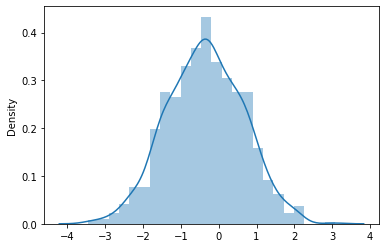

In [20]:
original_data = np.random.exponential(size = 1000)

# transform the original data & save lambda value
data,fitted_lambda = stats.boxcox(original_data)

# (optional) plot 
sns.distplot(data)